# Introduction to spaCy

Spacy is a popular library for advance NLP in Python. In this chapter we are going to take a look to the most important aspects of Spacy and how to get started.

### The `Nlp` object

At the center of Spacy is the object containing the processing pipeline. We usually call this variable `nlp`. For example to create an English `nlp` object you can import the English language class from `spacy.lang.en` and instanciated it:

In [3]:
# Import the English language class
from spacy.lang.en import English

In [4]:
# Create the nlp object
nlp = English()

You can use the `nlp` object like a function to analyze text. 

- It contains all the different components in the pipeline.
- It also includes all language-specific rules used for tokenizing the text into words and punctuation.

### The `Doc` object

When you process a text with the `nlp` object, Spacy creates a `doc` object, "doc" from document. 

In [5]:
# Created by processing a string of text with the nlp object
doc = nlp("Hello world!")

The `doc` let you access information about the text in a structured way. No information is lost. The `doc` behaves like a normal Python sequence by the way. And lets you iterate over its tokens or get the tokens by its index.

In [6]:
# Itereate over tokens in a Doc
for token in doc:
    print(token.text)

Hello
world
!


### The `Token` object

Token objets represent the tokens in the document. For example a word or a punctuation character.

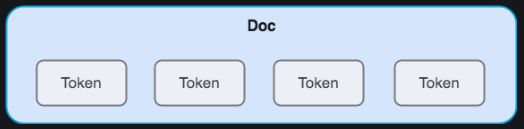

In [19]:
from IPython.display import display, Image
display(Image(filename='imgs/token-object-01.png'))

To get a token at a specific posiiton, you can index into the `doc`:

In [7]:
# Index into the Doc to get a single Token
token = doc[1]

Token object also provide various attributes that give you access more information about the tokens. For example the `.text` attribute returns the verbatin token text. 

In [8]:
# Get the token text via the .text attribute
print(token)

world


### The Span object

The `span` object is a slide of the document consisting of one or more tokens. It is only a view of the document, it doesn't contain any data itself.

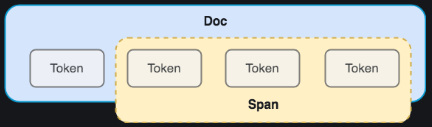

In [27]:
from IPython.display import display, Image
display(Image(filename='imgs/span-object-01.png'))

To createa a `span` you can use Pyhton slice notation. For example:

In [39]:
doc = nlp("Hellow world! I am here!")

In [40]:
# A slice from the Doc is a Span object
span = doc[1:4]

# Get the span text via the .text attribute
print(span.text)

world! I


I will create a slice dating form the token in at possition one up to, but not including, the token at possition 4. 

### Lexical attributes

Here you can see some of the available token attributes.`.i` is the index of the token within the parent document:

In [41]:
doc = nlp("It costs $5.")
print('Index: ', [token.i for token in doc])

Index:  [0, 1, 2, 3, 4]


In [50]:
for token in doc:
    print(token.i)

0
1
2
3
4


`.text` returns the text:

In [52]:
print('Index: ', [token.text for token in doc])

Index:  ['It', 'costs', '$', '5', '.']


`.is_alpha`, `.is_punct` and `.like_num` return boolean values indicating weather the token consists of alphanumeric characters, weather is punctuation or weather it simbolos a number. For example the token ten. 

In [53]:
print('Index: ', [token.is_alpha for token in doc])
print('Index: ', [token.is_punct for token in doc])
print('Index: ', [token.like_num for token in doc])

Index:  [True, True, False, False, False]
Index:  [False, False, False, False, True]
Index:  [False, False, False, True, False]


These attributes are also called "lexical" attributes. They refer to the entry in the vocabulary and don't depend on the token's context. Let's see all these in action and process some text with spaCy.

## Getting Started

Let's get started and try out spaCy! In this exercise, you'll be able to try out some of the 30+ [available languages](https://spacy.io/usage/models#languages).

Instructions:

- Import the `English` class from `spacy.lang.en` and create the `nlp` object.
- Create a `doc` and print its text.

In [54]:
# Import the English language class
from spacy.lang.en import English

In [55]:
# Create the nlp object
nlp = English()

In [60]:
# Created by processing a string of text with the nlp object
doc = nlp("When Mr. Bilbo Baggins of Bag End announced")

In [61]:
print(doc.text)

When Mr. Bilbo Baggins of Bag End announced


## Documents, spans and tokens
When you call `nlp` on a string, spaCy first tokenizes the text and creates a document object. In this exercise, you'll learn more about the `Doc`, as well as its views `Token` and `Span`.

- Import the `English` language class and create the `nlp` object.
- Process the text and instantiate a `Doc` object in the variable `doc`.
- Select the first token of the `Doc` and print its `text`.

In [62]:
# Import the English language class
from spacy.lang.en import English

In [63]:
# Create the nlp object
nlp = English()

In [68]:
# Created by processing a string of text with the nlp object
doc = nlp("I like tree kangaroos and narwhals.")

In [69]:
# select the first token 
first_token = doc[0]

In [70]:
# print the fist token's text
print(first_token.text)

I


- Create a slice of the `Doc` for the tokens "tree kangaroos" and "tree kangaroos and narwhals".

In [71]:
# A slice from the Doc is a Span object
three_kangaroos = doc[2:4]

# Get the span text via the .text attribute
print(three_kangaroos.text)

tree kangaroos


In [72]:
# A slice from the Doc is a Span object
three_kangaroos_and_narwhals = doc[2:6]

# Get the span text via the .text attribute
print(three_kangaroos_and_narwhals.text)

tree kangaroos and narwhals


## Lexical attributes
In this example, you'll use spaCy's `Doc` and `Token` objects, and lexical attributes to find percentages in a text. You'll be looking for two subsequent tokens: a number and a percent sign. The English `nlp` object has already been created.

- Iterate over the tokens in the document.
- Use the `like_num` token attribute to check whether the token resembles a number.
- Get the token following the current token in the document. You can use the `token.i` attribute to get the index of the current token.
- Check whether the following token's `text` attribute is a percent sign "%" and if so, print the current token.

In [105]:
# Process the text
doc = nlp("In 1990, more than 60% of people in East Asia were in extreme poverty. Now less than 4% are.")

In [106]:
print(doc.text)

In 1990, more than 60% of people in East Asia were in extreme poverty. Now less than 4% are.


In [117]:
# Iterate over the tokens in the doc
for token in doc:
    # Check if the token resembles a number
    if token.like_num:
        # Get the next token in the document
        next_token = doc[token.i + 1]
        # Check if the next token's text equals '%'
        if next_token.text == '%':
            # Print the number token's text
            print('Percentage found:', token.text)

Percentage found: 60
Percentage found: 4
